# Big Mart Sales Prediction

                                                                                        Code Written By: Dasari Mohan
                                                                                        
## Data Description:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Objective: 

The aim of this project is to build a predictive model and find out the sales of each product at a particular store.

### Data fields:

1.	Item_Identifier: Unique product ID
2.	Item_Weight: Weight of product
3.	Item_Fat_Content: Whether the product is low fat or not
4.	Item_Visibility: The % of total display area of all products in a store allocated to the particular product
5.	Item_Type: The category to which the product belongs
6.	Item_MRP: Maximum Retail Price (list price) of the product
7.	Outlet_Identifier: Unique store ID
8.	Outlet_Establishment_Year: The year in which store was established
9.	Outlet_Size: The size of the store in terms of ground area covered
10.	Outlet_Location_Type: The type of city in which the store is located
11.	Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
12.	Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [4]:
#Importing Necessary Libraries

%matplotlib notebook
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [121]:
#Importing the datasets

train =pd.read_csv("train_kOBLwZA.csv")
test=pd.read_csv("test_t02dQwI.csv")

print('Train shape:',train.shape,'Test shape:',test.shape)

Train shape: (8523, 12) Test shape: (5681, 11)


In [122]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [123]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [173]:
def concat(X,Y):
    df= pd.concat([X,Y],ignore_index=True)
    return df

In [174]:
df=concat(train,test)
print(df.shape)

(14204, 12)


In [175]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploring Data Analysis

In [176]:
#Checks number of null values for all the variables
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

#### Observation:
Item_Weight has 17.1%  null values of all data 

Outlet Size has 28.2% null values of all data

In [177]:
# Checking n0.of unique entries correspnding to each variable

df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [178]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Frequency of unique entries in categorical type columns 

In [179]:
def frequency_each_item(X,Y):
    for i in Y:
        print("\nFrequency of each variable in",i)
        print('\n')
        print(X[i].value_counts())
category_list = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
frequency_each_item(df,category_list)


Frequency of each variable in Item_Fat_Content


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of each variable in Item_Type


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of each variable in Outlet_Location_Type


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of each variable in Outlet_Size


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of each

#### Correcting the mis-written datas

In [180]:
df['Item_Fat_Content'].replace(to_replace =['low fat','reg','LF'], 
                 value =['Low Fat','Regular','Low Fat'],inplace=True)
df['Item_Fat_Content'].value_counts()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Imputing null values in Outlet_Size and Item weight with mode and mean values of their respective columns

In [181]:
df['Outlet_Size'].fillna('Medium',inplace=True)
df['Item_Weight'].fillna(df.Item_Weight.mean(),inplace=True)
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

#### Adding one more column by replacing items code with their names

In [182]:
df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)


# Dropping the redundant column
df=df.drop(columns=['Item_Type'])     
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable


In [183]:
# Calculating number of Item_fat_contents that are also non_consumable

bool3=df['Item_Type_combined']=='Non_consumable'
df['Item_Fat_Content'][bool3]='Non_edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_edible    2686
Name: Item_Fat_Content, dtype: int64

#### Adding a column with no.of years when the outlet was established

In [184]:
df['yearsold']=2013-df['Outlet_Establishment_Year']
df=df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,yearsold
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


#### Checking for correation between different numerical columns

In [185]:
correlation = df.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,yearsold
Item_Weight,1.000000,-0.013641,0.033002,0.011083,-0.000462
Item_Visibility,-0.013641,1.000000,-0.006351,-0.128625,0.083678
Item_MRP,0.033002,-0.006351,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.011083,-0.128625,0.567574,1.000000,0.049135
yearsold,-0.000462,0.083678,-0.000141,0.049135,1.000000


#### Heat Map

<AxesSubplot:>

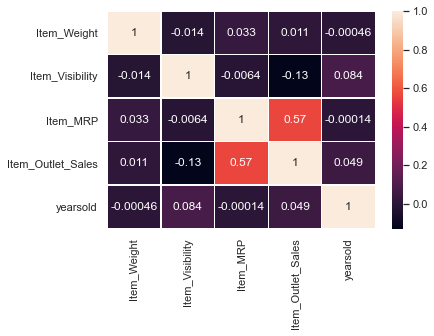

In [186]:
sns.heatmap(data=correlation,annot=True,linewidths=0.2)

# Identifying outliers and fixing them

In [187]:
df.describe()            

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,yearsold
count,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,2181.288914,15.169319
std,4.234226,0.051459,62.086938,1706.499616,8.371664
min,4.555000,0.000000,31.290000,33.290000,4.000000
25%,9.300000,0.027036,94.012000,834.247400,9.000000
50%,12.792854,0.054021,142.247000,1794.331000,14.000000
75%,16.000000,0.094037,185.855600,3101.296400,26.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000


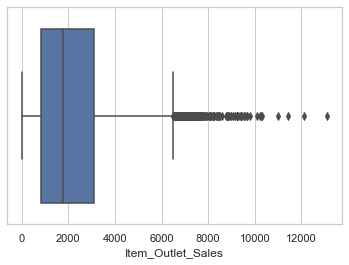

In [188]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Item_Outlet_Sales"])

#### Observation:
As we know only Item_Outlet_Sales have outliers, we can remove outliers but fixing them will increase our Root Mean Square Error score and buliding ML model on top of that is not robust

# Data Visualization - for Insights of the data

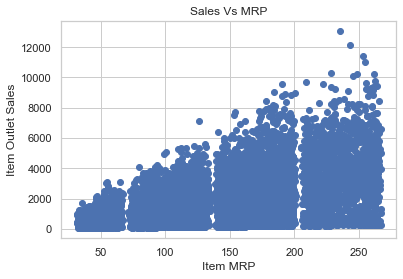

In [189]:
# Sales increases for the increase in MRP of the item
plt.scatter(x=df.Item_MRP, y=df.Item_Outlet_Sales)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Sales Vs MRP')
plt.show()

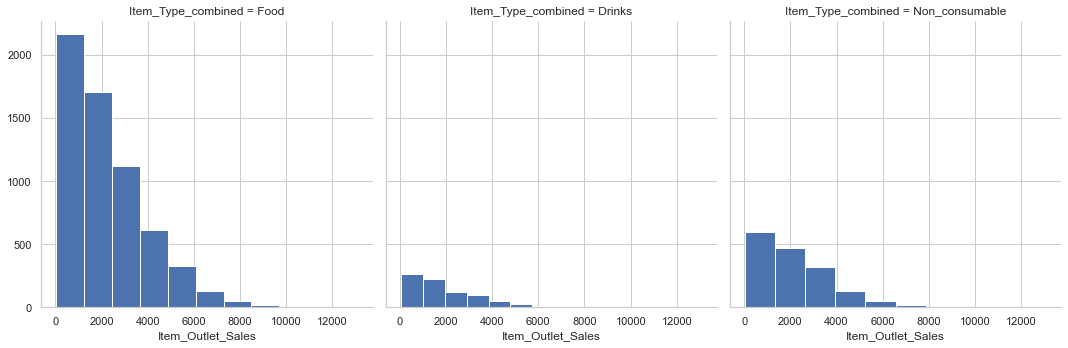

In [190]:
sns.FacetGrid(df, col='Item_Type_combined', size=5).map(plt.hist, 'Item_Outlet_Sales')

#### Observation:
Maximum contribution to outlet sales is from Items that are food type and least is from drinks

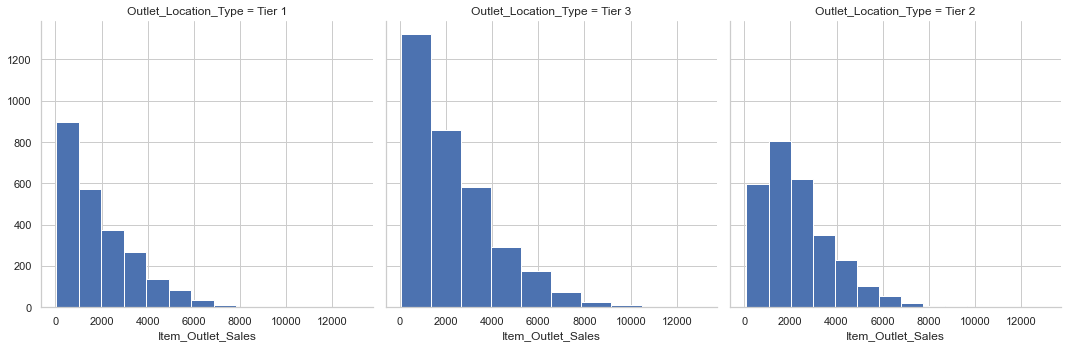

In [191]:
sns.FacetGrid(df, col='Outlet_Location_Type', size=5).map(plt.hist, 'Item_Outlet_Sales')

#### Observation:
Tier3 type of outlet location provides for the maximum sales and other two provides the least sales

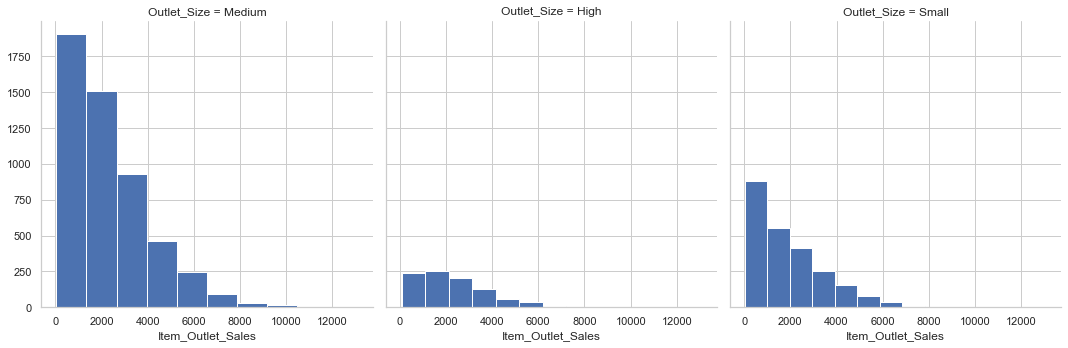

In [192]:
sns.FacetGrid(df, col='Outlet_Size', size=5).map(plt.hist, 'Item_Outlet_Sales')

#### Observation:
Small sized Outlets are providing the maximum sales whereas large sized outlets are contributing the least

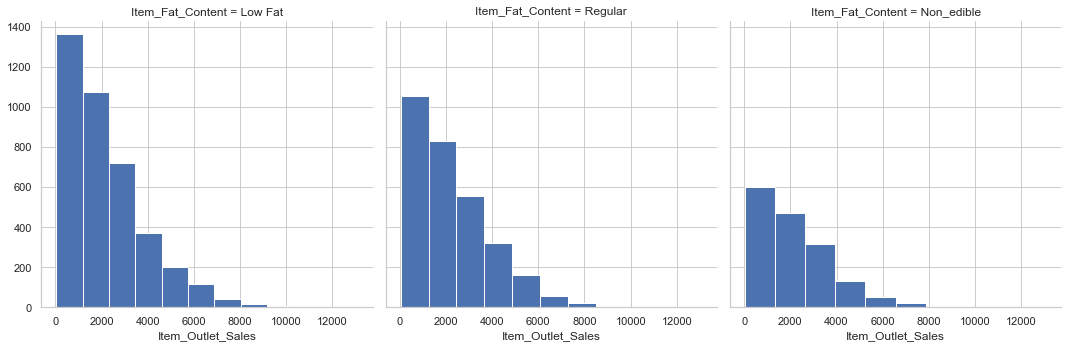

In [193]:
sns.FacetGrid(df, col='Item_Fat_Content', size=5 ).map(plt.hist, 'Item_Outlet_Sales')

#### Observation:
Its Looks like Customers are mostly prefering items with lowest fat content

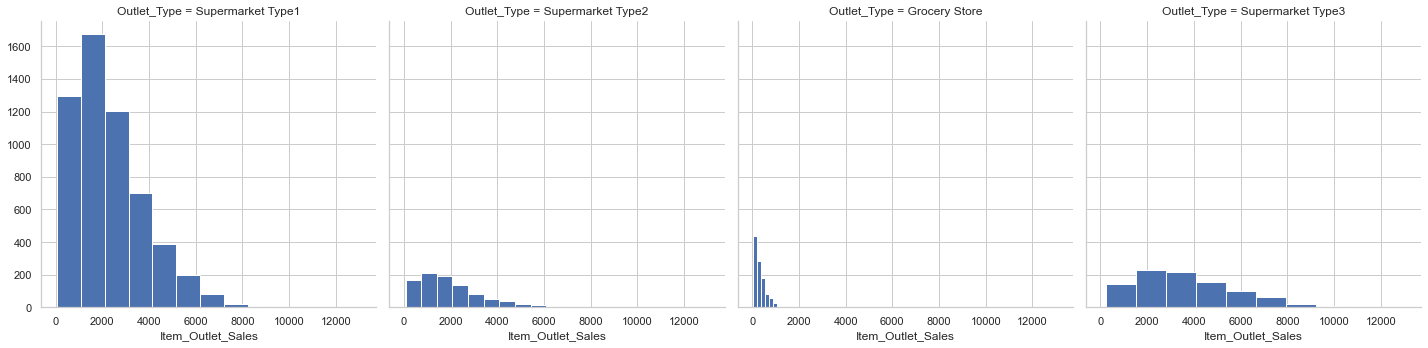

In [194]:
sns.FacetGrid(df, col='Outlet_Type', size=5).map(plt.hist, 'Item_Outlet_Sales')

#### Observation:
Maximum of the high sales margin is from Supermarket Type1 and Grocery store has the least sales

### Label Encoding all the columns with text entries and dropping Item_identifier  

In [195]:
le=LabelEncoder()
list=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_combined',
      'Outlet_Size']
for i in list:
    le.fit(df[i])
    df[i]=le.transform(df[i])
df_new=df.drop(columns='Item_Identifier')
df_new= pd.get_dummies(df_new,columns=['Outlet_Identifier'])
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,yearsold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,1,14,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,1,2,2,443.4228,0,4,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,1,14,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.000000,182.0950,1,2,0,732.3800,1,15,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,0,2,1,994.7052,2,26,0,1,0,0,0,0,0,0,0,0


### Preparing Train and Test datasets 

In [228]:
#Separating test and train set
X_train=df_new.iloc[:8523,:]
X_test=df_new.iloc[8523:,:]
y_test = X_test['Item_Outlet_Sales']
X_test=X_test.drop(columns=['Item_Outlet_Sales'])

In [197]:
y_train = X_train['Item_Outlet_Sales']
X_train = X_train.drop(columns=['Item_Outlet_Sales'])

### Standardization

In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized=scaler.fit_transform(X_train)

column_names = X_train.columns

df_standardized = pd.DataFrame(data=standardized,columns=column_names)

df_standardized.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,yearsold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,-0.839226,-0.997813,-0.970732,1.747454,-0.284581,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
1,-1.639047,1.236942,-0.908111,-1.489023,-0.284581,1.091569,1.002972,-2.095286,-1.334103,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
2,1.101168,-0.997813,-0.956917,0.010040,-0.284581,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
3,1.503445,1.236942,-1.281758,0.660050,-0.284581,1.091569,-1.508289,-0.179795,-0.020085,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
4,-0.926780,0.119565,-1.281758,-1.399220,-1.950437,1.091569,-0.252658,1.735696,1.293934,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973


# Buliding a Regression Model

In [201]:
# Lets import all type of regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score

In [202]:
models = [('lr',LinearRegression()),('ridge',Ridge()),('rfr',RandomForestRegressor()),('etr',ExtraTreesRegressor()),
         ('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet()),('mlp',MLPRegressor())]

In [211]:
# Making function for making best 2 models for further hyperparameter tuning
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i , j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [205]:
basic_model_selection(X_train,y_train, 4, models)

lr 0.5600419722724251
ridge 0.5600496910399244
rfr 0.5482687927244074
etr 0.5124461922610528
br 0.5176197024262801
gbr 0.5914878037354516
en 0.476598659060383
mlp 0.566135198832963


## GradientBoosting Regression Model for hyperparameter tuning

In [212]:
# Lets Define a function for hyper parameter tuning and using RMSE as metric

def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model, parameters, cv = cross_folds, verbose=True)
    
    model_grid.fit(x,y)
    
    y_predicted = model_grid.predict(x)
    
    print(model_grid.score)
    print(model_grid.best_params_)
    print("RMSE score :",np.sqrt(np.mean((y-y_predicted)**2)))

In [213]:
# Defining the useful parameters for parameter tuning to get the optimum output

parameters_gbr={'loss':['ls','lad'], 
                'learning_rate':[0.1],
                'n_estimators':[400],
                'min_samples_split':[3,4],
                'max_depth':[4,5],
                'min_samples_leaf':[3,4], 'max_features':['auto','log2','sqrt']}

In [214]:
GBR = GradientBoostingRegressor()
model_parameter_tuning(X_train,y_train, GBR, parameters_gbr, 4)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1], 'loss': ['ls', 'lad'],
                         'max_depth': [4, 5],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4], 'n_estimators': [400]},
             verbose=True)>
{'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 400}
RMSE score : 1043.0295502047345


## MultiLayer Perceptron Regression Model for hyperparameter tuning

In [215]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor()
parameters_mlp = {'hidden_layer_sizes':[300,400],
              'activation':['relu'],
              'learning_rate':['adaptive'],
              'learning_rate_init':[0.001,0.004],
              'solver':['adam'],
              'max_iter':[200,300]}

In [216]:
model_parameter_tuning(X_train,y_train,MLP, parameters_mlp, 4)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=4, estimator=MLPRegressor(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [300, 400],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.001, 0.004],
                         'max_iter': [200, 300], 'solver': ['adam']},
             verbose=True)>
{'activation': 'relu', 'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'learning_rate_init': 0.004, 'max_iter': 200, 'solver': 'adam'}
RMSE score : 1073.5636940855159


# Using Robust Scaler

###### Since Our dataset having outliers make it more prone to mistakes but Robust Scaler handles the outliers as well as it scales according to the quartile range

In [217]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()

robust = RobustScaler(quantile_range = (0.1,0.8)) #range of inerquartile is one of the parameters

robust_stan = robust.fit_transform(X_train)

robust_stan_normalize = normalize.fit_transform(robust_stan)

# Also normalized the dataset using MinMaxScaler i.e set the data between (0,1)
df_robust_normalize = pd.DataFrame(robust_stan_normalize,columns=column_names)
df_robust_normalize.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,yearsold,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.282525,0.0,0.048866,0.927507,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,1.0,0.058705,0.072068,0.5,1.0,0.666667,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.0,0.051037,0.468288,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,1.0,0.000000,0.640093,0.5,1.0,0.000000,0.5,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.5,0.000000,0.095805,0.0,1.0,0.333333,1.0,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Selecting Best Model with Best Hyperparameters

Gradient Boosting Method is the best method when implemented using Robust Scaler and MinMaxScaler normalization with low error value

In [218]:
robust_test = robust.fit_transform(X_train)
robust_normalize_test = normalize.fit_transform(robust_test)
df_test_robust_normalize = pd.DataFrame(robust_normalize_test, columns=column_names)

In [221]:
final_model = GradientBoostingRegressor(learning_rate= 0.1, loss= 'lad', 
                                        max_depth= 4, max_features= 'auto', 
                                        min_samples_leaf= 4, min_samples_split= 4, 
                                        n_estimators= 400,random_state=23)

In [222]:
final_model.fit(df_robust_normalize,y_train)

GradientBoostingRegressor(loss='lad', max_depth=4, max_features='auto',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=400, random_state=23)

In [223]:
#Predicting the outlet sales
final_prediction = final_model.predict(df_test_robust_normalize) 

In [224]:
# The prediction is in the form of numpy array therefore Convert into a Dataframe 
df_final_prediction = pd.DataFrame(final_prediction,columns=['Item_Outlet_Sales'])
df_final_prediction.head()

,Item_Outlet_Sales
0,4000.862277
1,639.616805
2,2189.690230
3,532.683604
4,818.510501


# Saving the final model using Joblib

In [225]:
import joblib
filename = 'final_model.sav' # Name of the model 
joblib.dump(final_model, filename) # it is saved in your current working directory

['final_model.sav']

# Conclusion

1. We have clean the dataset and imputed null values with mean and mode values 

2. Tier3 type of outlet location provides for the maximum sales and other two provides the least sales

3. Maximum contribution to outlet sales is from Items that are food type and least is from drinks

4. Small sized Outlets are providing the maximum sales whereas large sized outlets are contributing the least

5. Customers are mostly prefering items with lowest fat content

6. Maximum of the high sales margin is from Supermarket Type1 and Grocery store has the least sales

7. We Built different Regression Models and choosed GradientBoosting Regressor for final model

8. Since Our dataset having outliers make it more prone to mistakes we used Robust Scaler as it handles the outliers more effeciently

9. With finalized model being saved as joblib file, we can use it for future predictions